# AutoGen Basics
## 4 Basic steps
1. Define configuration list
2. Define the assistant
3. Define the user
4. Initiate chat (solve the task)

In [29]:
# !pip install pyautogen 

In [30]:
# source: https://github.com/microsoft/autogen/blob/main/test/twoagent.py
%matplotlib inline
from autogen import AssistantAgent, UserProxyAgent, config_list_from_json
from autogen.coding import LocalCommandLineCodeExecutor

# Load LLM inference endpoints from an env variable or a file
# See https://microsoft.github.io/autogen/docs/FAQ#set-your-api-endpoints
# and OAI_CONFIG_LIST_sample

config_list = config_list_from_json(env_or_file="OAI_CONFIG_LIST")

In [31]:
assistant = AssistantAgent("assistant", llm_config={"config_list": config_list})

In [32]:
from pathlib import Path

work_dir = Path("coding")
code_executor = LocalCommandLineCodeExecutor(work_dir=work_dir)

In [33]:
user_proxy = UserProxyAgent("user_proxy", code_execution_config={"executor": code_executor})

In [34]:
user_proxy.initiate_chat(assistant, message="Plot a chart of NVDA and TESLA stock price change YTD and save it under stock_price_change_ytd.png")

user_proxy (to assistant):

Plot a chart of NVDA and TESLA stock price change YTD and save it under stock_price_change_ytd.png

--------------------------------------------------------------------------------
assistant (to user_proxy):

To plot the chart of NVDA and TSLA stock price change YTD, follow these steps:

1. Install necessary libraries.
2. Retrieve stock price data for NVDA and TSLA.
3. Compute the Year-To-Date (YTD) change for each stock.
4. Plot the chart and save it as `stock_price_change_ytd.png`.

Let's proceed step-by-step. For the purpose of this task, we'll use the `yfinance` library to fetch stock data and `matplotlib` for plotting.

Here's the Python code:

```python
# filename: plot_stock_price_change_ytd.py
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

# Step 1: Define a function to get the closing prices and YTD change
def get_ytd_change(ticker):
    stock_data = yf.Ticker(ticker)
    hist_data = stock_da

ChatResult(chat_id=None, chat_history=[{'content': 'Plot a chart of NVDA and TESLA stock price change YTD and save it under stock_price_change_ytd.png', 'role': 'assistant'}, {'content': 'To plot the chart of NVDA and TSLA stock price change YTD, follow these steps:\n\n1. Install necessary libraries.\n2. Retrieve stock price data for NVDA and TSLA.\n3. Compute the Year-To-Date (YTD) change for each stock.\n4. Plot the chart and save it as `stock_price_change_ytd.png`.\n\nLet\'s proceed step-by-step. For the purpose of this task, we\'ll use the `yfinance` library to fetch stock data and `matplotlib` for plotting.\n\nHere\'s the Python code:\n\n```python\n# filename: plot_stock_price_change_ytd.py\nimport yfinance as yf\nimport matplotlib.pyplot as plt\nimport pandas as pd\nfrom datetime import datetime\n\n# Step 1: Define a function to get the closing prices and YTD change\ndef get_ytd_change(ticker):\n    stock_data = yf.Ticker(ticker)\n    hist_data = stock_data.history(period="ytd")\

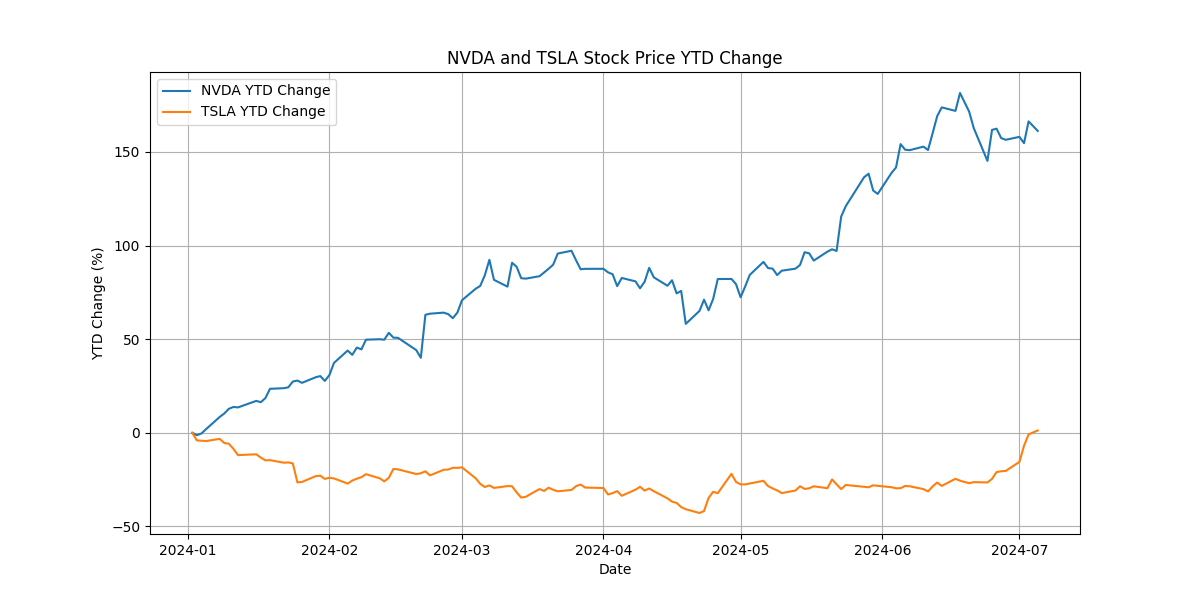

In [36]:
from IPython.display import Image

# Specify the path to the image file
image_path = "./coding/stock_price_change_ytd.png"

# Display the image
Image(filename=image_path)